In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing, load_iris

## Part 1 

In [2]:
housing_data = fetch_california_housing(as_frame=True)
X = pd.DataFrame(housing_data.data, columns = housing_data.feature_names)
y = pd.Series(housing_data.target)

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [4]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [5]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


There are no missing values in our dataset. the info() function shows this.

## Part 2

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


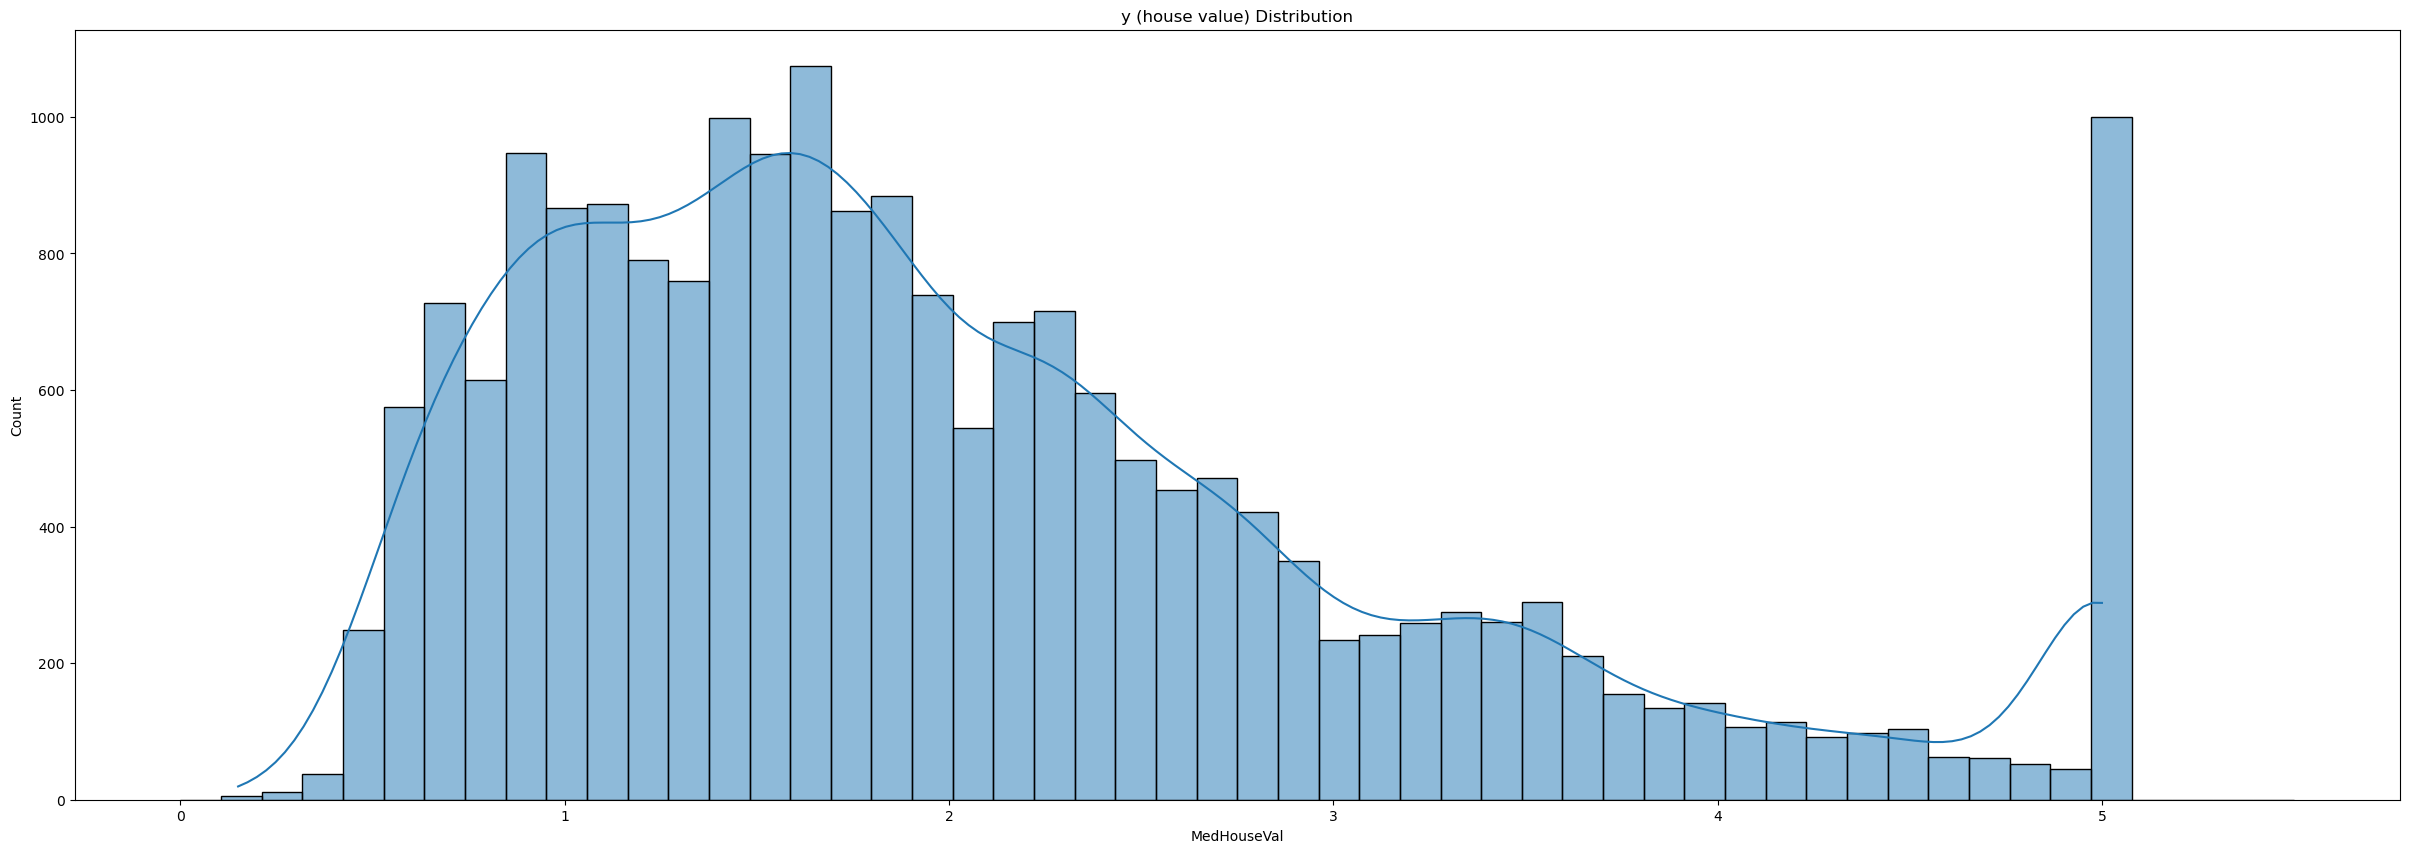

In [6]:
plt.figure(figsize = (30,10))
sns.histplot(x=y, kde=True, binrange=(0,5.5))
plt.title('y (house value) Distribution')
plt.show()

The target variable is mainly skewed to the right, but has high no. of observations close to 5.

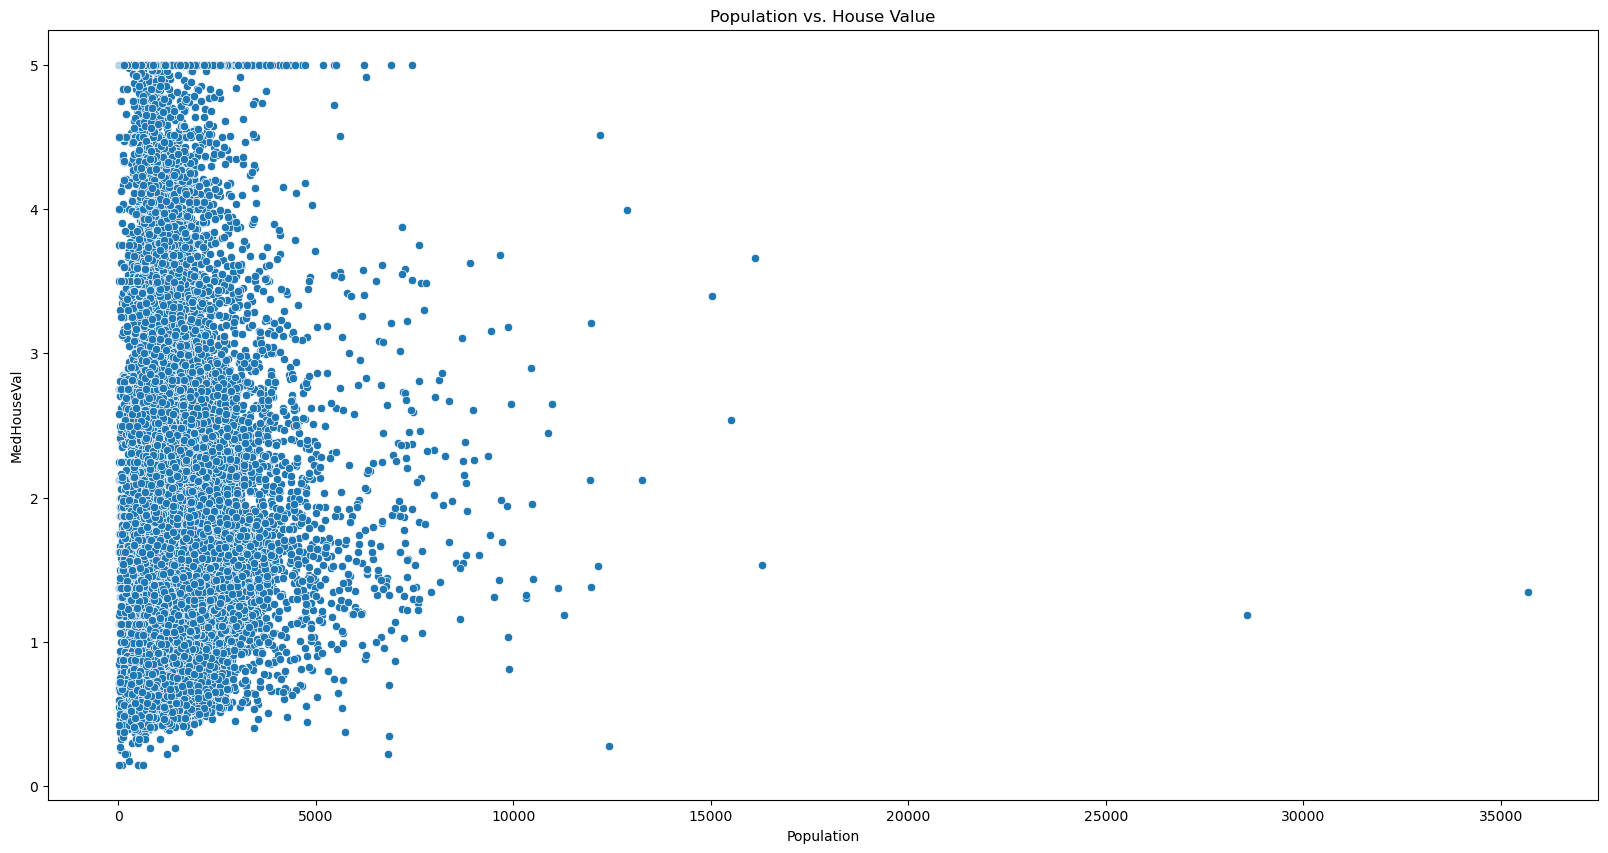

In [7]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = X['Population'], y = y)
plt.title('Population vs. House Value')
plt.show()


The population doesn't vary much, it is usually between 0-10000.

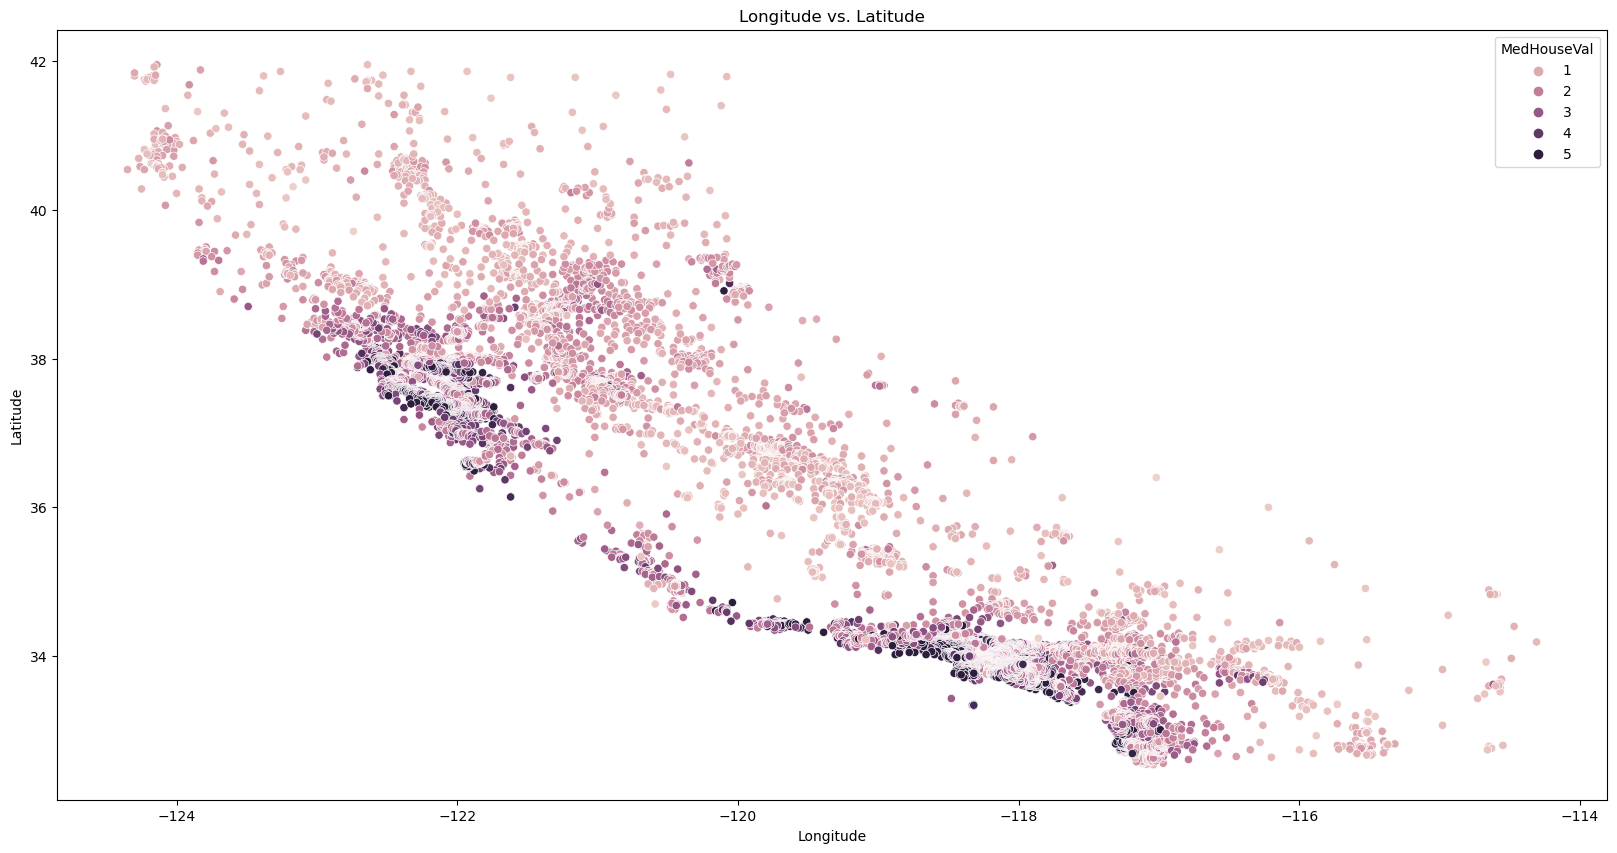

In [8]:
plt.figure(figsize = (20,10))
sns.scatterplot(x='Longitude', y = 'Latitude', data = X, hue = y)
plt.title('Longitude vs. Latitude')
plt.show()

Places with lower longitude and higher latitudes seems to have higher values for houses.

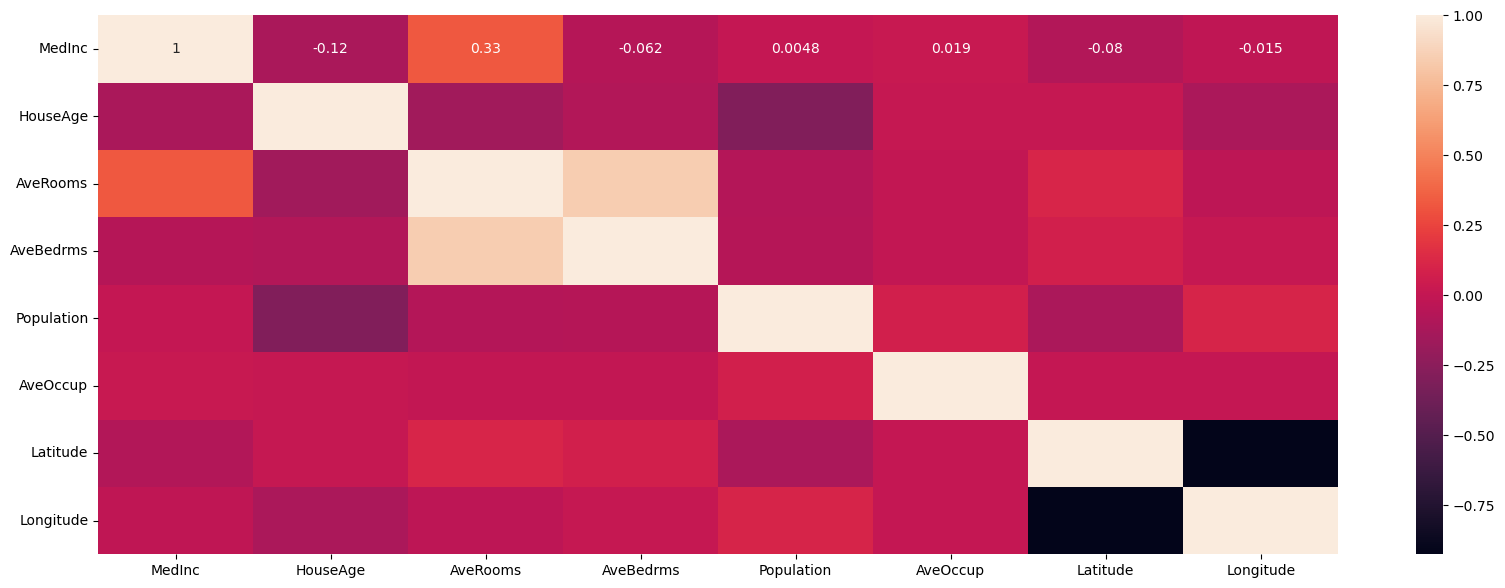

In [9]:
corr = X.corr()

plt.figure(figsize = (20,7))
sns.heatmap(data=corr, annot = True)
plt.show()

Longitude and latitude has a negative relationship, and average rooms and bedrooms has a strong positive relationship.

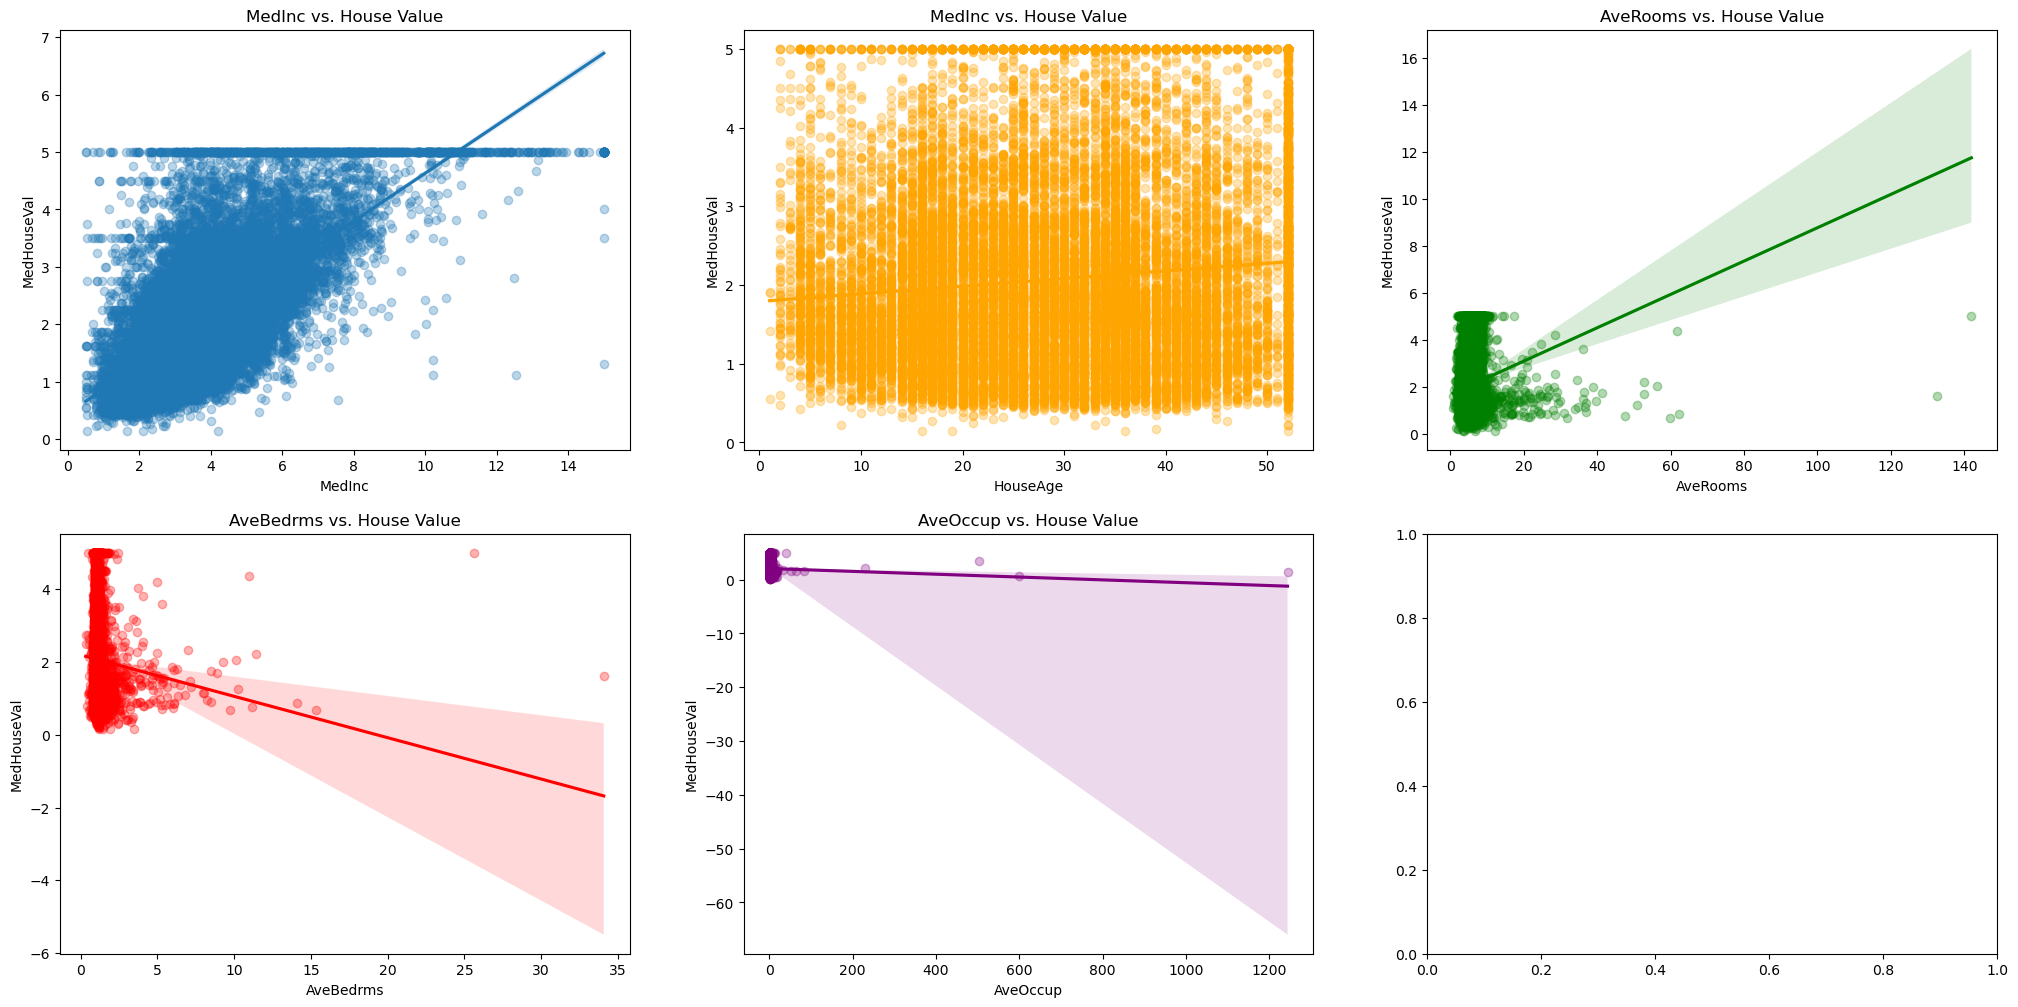

In [10]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (25,12))
sns.regplot(x=X['MedInc'],y=y,scatter_kws={"alpha": 0.3},ax=axes[0][0])
axes[0][0].set_title('MedInc vs. House Value')

sns.regplot(x=X['HouseAge'],y=y,scatter_kws={"alpha": 0.3},color ='orange',ax=axes[0][1])
axes[0][1].set_title('MedInc vs. House Value')

sns.regplot(x=X['AveRooms'],y=y,scatter_kws={"alpha": 0.3},color = 'green', ax=axes[0][2])
axes[0][2].set_title('AveRooms vs. House Value')

sns.regplot(x=X['AveBedrms'],y=y,scatter_kws={"alpha": 0.3},color = 'red',ax=axes[1][0])
axes[1][0].set_title('AveBedrms vs. House Value')

sns.regplot(x=X['AveOccup'],y=y,scatter_kws={"alpha": 0.3},color = 'purple',ax=axes[1][1])
axes[1][1].set_title('AveOccup vs. House Value')

plt.show()

there doesn't seem to be a correlation between both MedInc and Housevalue and AveOccup and House Value.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


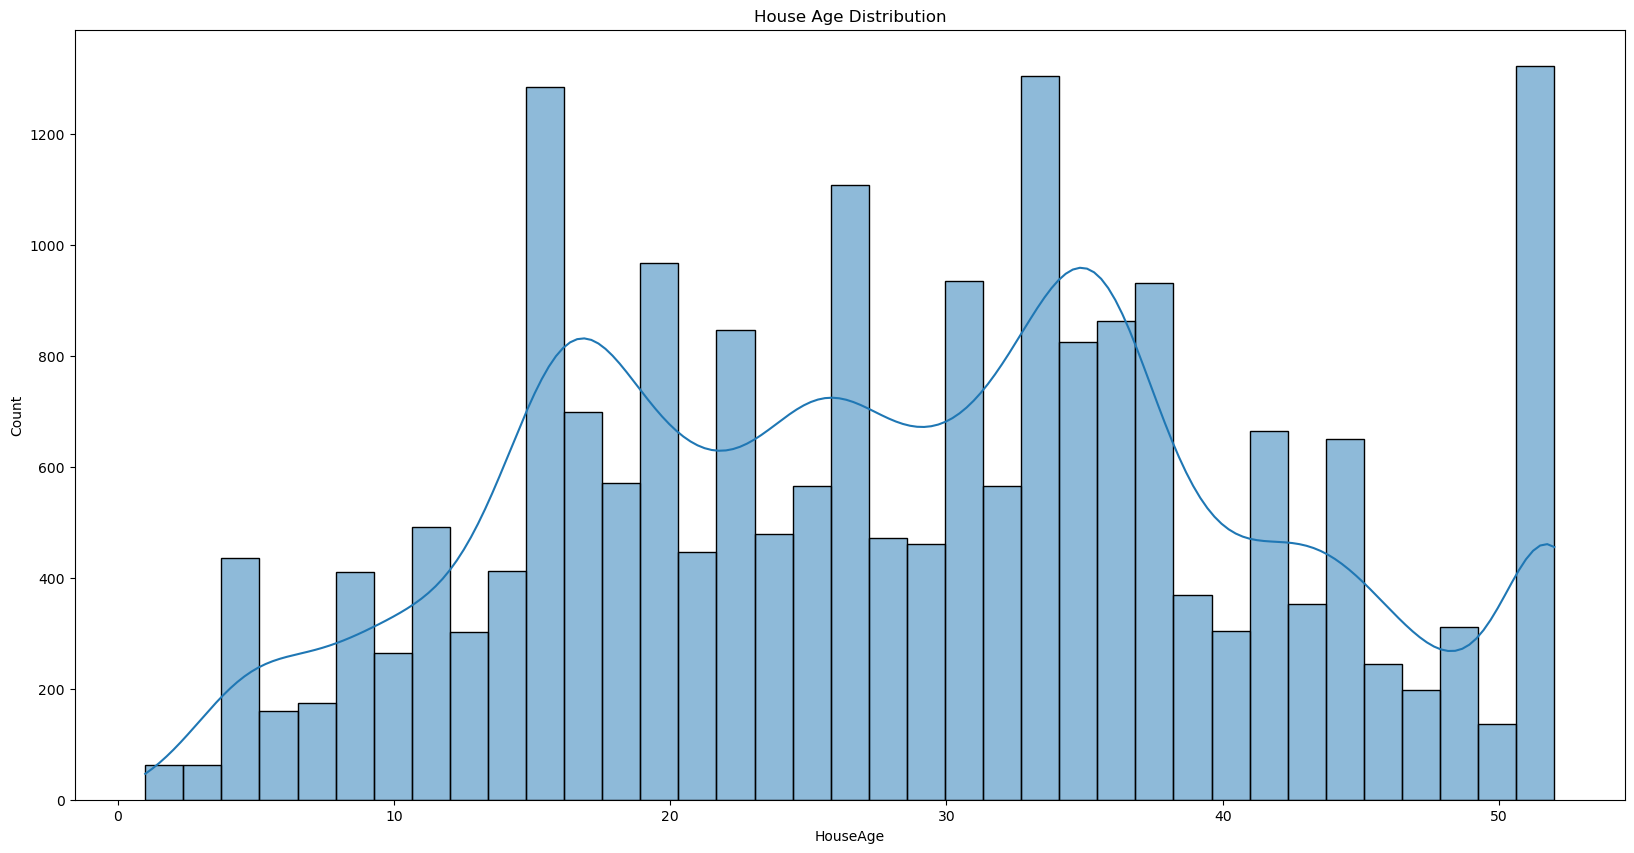

In [11]:
plt.figure(figsize = (20,10))
sns.histplot(x= X['HouseAge'], kde=True)
plt.title('House Age Distribution')
plt.show()

The distribution is approximately normal, with curvatures in the middle of the graph.

# Part 3

In [12]:
#1.
from sklearn.preprocessing import StandardScaler, normalize
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X = pd.DataFrame(data=scaled_X, columns = housing_data.feature_names) 
scaled_X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818


In [13]:
#2. 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_X,y,test_size=0.3,random_state=42)

In [14]:
#3.
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes = (130,64,32,16), activation='relu')
mlp.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(130, 64, 32, 16))

In [15]:
#4.
mlp_preds = mlp.predict(X_test)

In [16]:
#5.
from sklearn.metrics import r2_score

print(f'The R-squared of our model is: {r2_score(y_test,mlp_preds):.2f}')

The R-squared of our model is: 0.79


The model is not bad. an r2 score of 0.79 is good, but could be better.

In [17]:
mlp2 = MLPRegressor(hidden_layer_sizes = (200,100,50,25), activation='relu')
mlp2.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(200, 100, 50, 25))

In [18]:
mlp2_preds = mlp2.predict(X_test)
print(f'The R-squared of our mlp2 model is: {r2_score(y_test,mlp2_preds):.2f}')
#no change

The R-squared of our mlp2 model is: 0.77


In [19]:
mlp3 = MLPRegressor(hidden_layer_sizes = (100,50,25,12), activation='relu')
mlp3.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 50, 25, 12))

In [20]:
mlp3_preds = mlp3.predict(X_test)
print(f'The R-squared of our mlp3 model is: {r2_score(y_test,mlp3_preds):.2f}')
#it decreased. not good.

The R-squared of our mlp3 model is: 0.80


In [21]:
mlp4 = MLPRegressor(hidden_layer_sizes = (729,243,81,27), activation='relu')
mlp4.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(729, 243, 81, 27))

In [22]:
mlp4_preds = mlp4.predict(X_test)
print(f'The R-squared of our mlp4 model is: {r2_score(y_test,mlp4_preds):.2f}')
#did not get any better. also took a lot of time!

The R-squared of our mlp4 model is: 0.78


In [23]:
mlp5 = MLPRegressor(hidden_layer_sizes = (81,27,9,3), activation='relu')
mlp5.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(81, 27, 9, 3))

In [24]:
mlp5_preds = mlp5.predict(X_test)
print(f'The R-squared of our mlp5 model is: {r2_score(y_test,mlp5_preds):.2f}')
#doesn't get any better

The R-squared of our mlp5 model is: 0.80


I tried to play around the hidden layer sizes but the r-score doesn't seem to change much.

In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(81,27,9,3), (130, 64, 32, 16), (100,50,25), (100,)],
    'activation': ['relu', 'tanh'],
    'max_iter': [200, 500]
}
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_

GridSearchCV(cv=5, estimator=MLPRegressor(hidden_layer_sizes=(130, 64, 32, 16)),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [(81, 27, 9, 3),
                                                (130, 64, 32, 16),
                                                (100, 50, 25), (100,)],
                         'max_iter': [200, 500]},
             verbose=2)

In [26]:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best parameters found:  {'activation': 'tanh', 'hidden_layer_sizes': (100, 50, 25), 'max_iter': 200}
Best cross-validation score:  0.7952040111757672


# Part 4

In [27]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data)
iris_df['species']=iris.target
iris_df.columns = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'species']
iris_df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
iris_df.describe()

,sepal_len,sepal_wid,petal_len,petal_wid,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [29]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sepal_len  150 non-null    float64
 1   sepal_wid  150 non-null    float64
 2   petal_len  150 non-null    float64
 3   petal_wid  150 non-null    float64
 4   species    150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


there are no missing values. the output on the info() proves this, and also we can see that there are no zeros in the minimum values in the describe() output.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

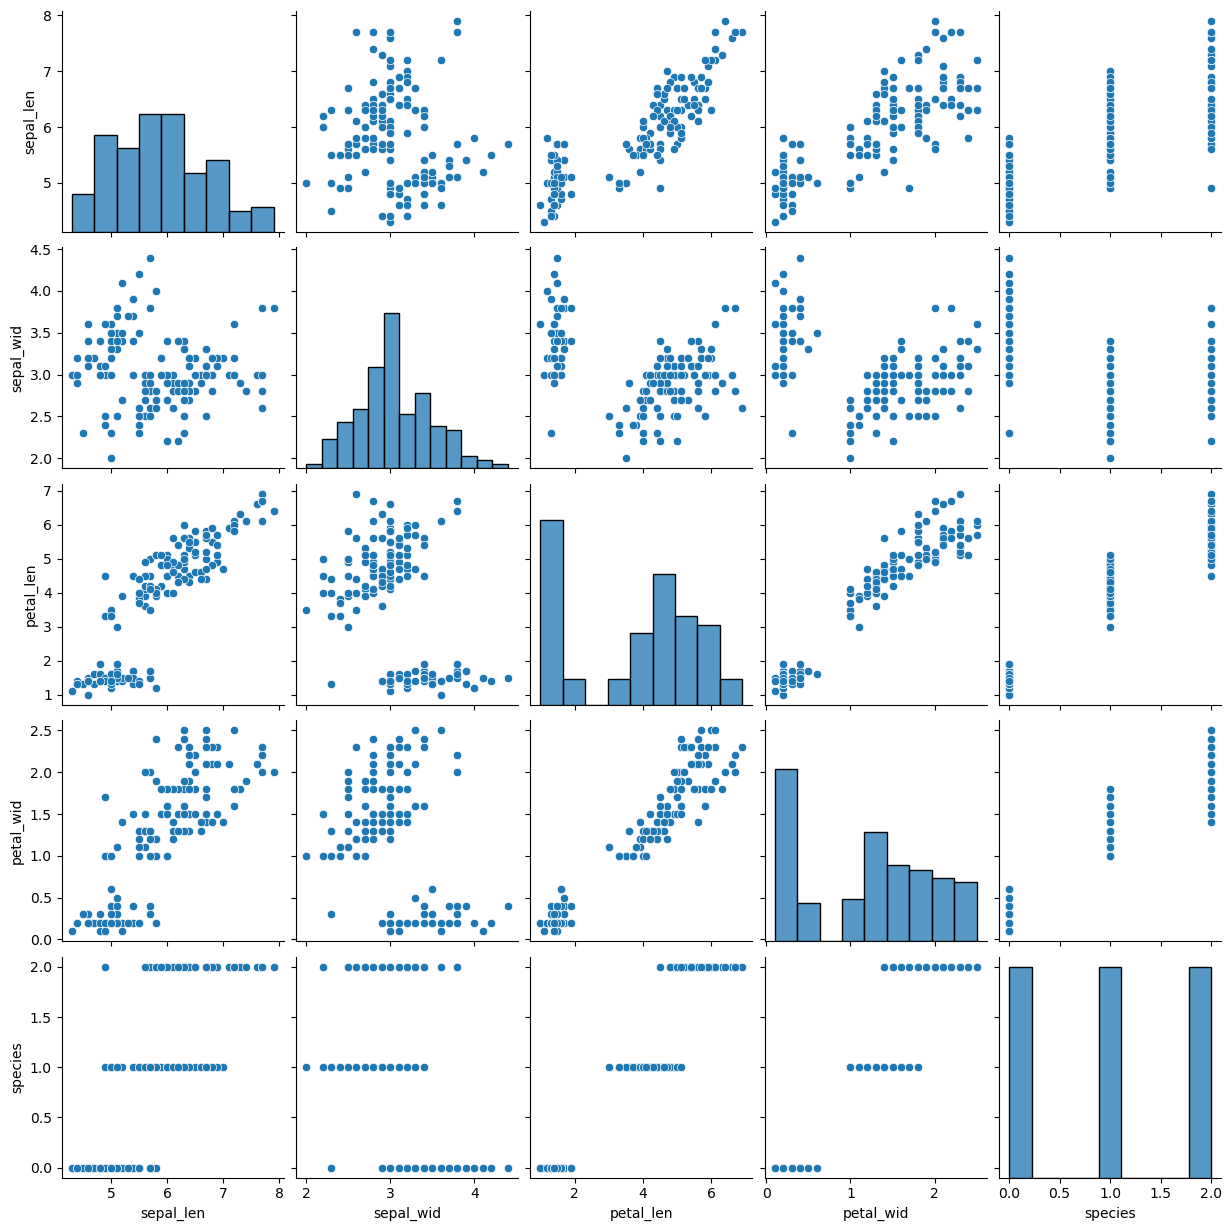

In [30]:
sns.pairplot(data=iris_df)
plt.show()

the sepal length and width and petal length and widths seem to be increasing with the species type. type 0 has the lowest, and type 2 has the higest. 

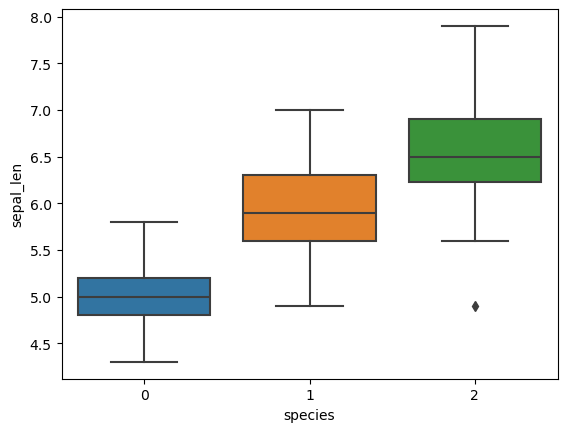

In [31]:
sns.boxplot(data=iris_df, x = 'species', y = 'sepal_len')
plt.show()

the lengths increase with the species types, type 2 has the highest average, range and mean of lengths. also, type 2 has an outlier.

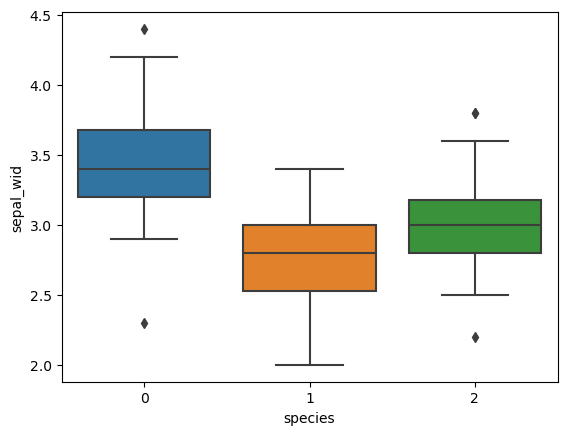

In [32]:
sns.boxplot(data=iris_df, x = 'species', y = 'sepal_wid')
plt.show()

here, type 0 has the highest average of sepal wid and type 1 has the lowest, and types 0 and 2 have outliers.

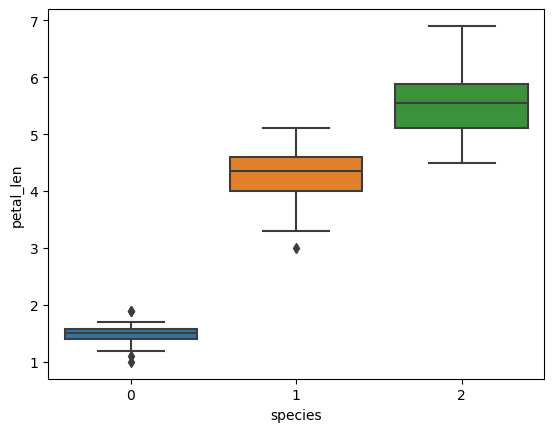

In [33]:
sns.boxplot(data=iris_df, x = 'species', y = 'petal_len')
plt.show()

the lengths increase with the species types, type 2 has the highest average, range and mean of lengths. also, type 1 and 0 have outliers.

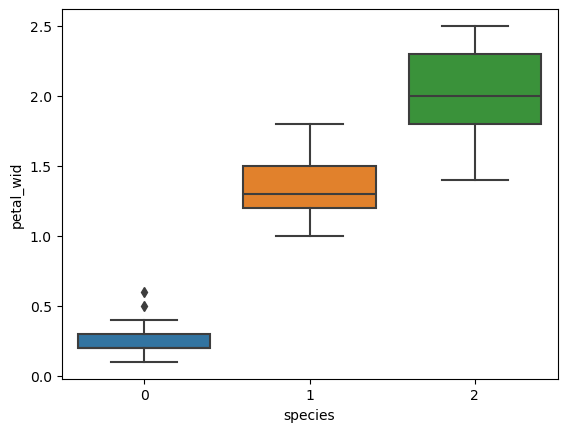

In [34]:
sns.boxplot(data=iris_df, x = 'species', y = 'petal_wid')
plt.show()

again, the widths increase with the species types, type 2 has the highest average, range and mean of lengths. also, type 1 has outliers.

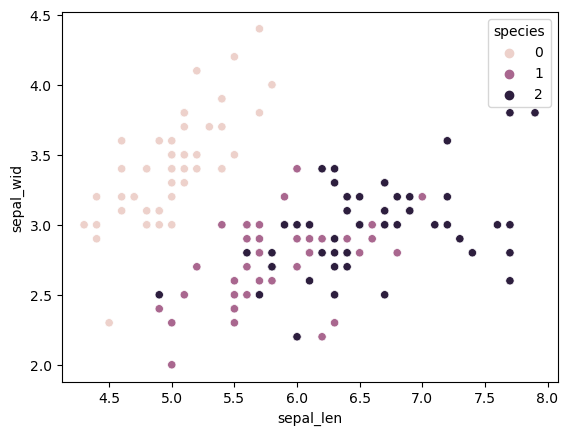

In [35]:
sns.scatterplot(data=iris_df, x = 'sepal_len', y = 'sepal_wid', hue='species')
plt.show()

for type 0 of species, sepal length and sepal width have a positive linear relationship. however, for the other types, they don't seem to be highly correlated. there could be a slight positive relationship.

# Part 5

In [36]:
X = iris_df.drop(labels=['species'],axis=1)
y = iris_df['species']

#1.
from sklearn.preprocessing import StandardScaler, normalize
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X = pd.DataFrame(data=scaled_X, columns = X.columns) 
scaled_X.head()

,sepal_len,sepal_wid,petal_len,petal_wid
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [37]:
#2.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_X,y,test_size=0.3,random_state=42)

In [38]:
#3.
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes = (256,128,64,32), activation='relu')
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32))

In [39]:
#4.
mlp_preds = mlp.predict(X_test)

In [40]:
#5.
from sklearn.model_selection import cross_val_score

scores = cross_val_score(mlp,X,y,cv=10,scoring='accuracy')

print(f'\nAverage cross-validation scores: {scores.mean():.4f}')

from sklearn.metrics import accuracy_score

print(f'\n Average accuracy score on the test sets: {accuracy_score(y_test,mlp_preds):.4f}')

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Average cross-validation scores: 0.9800

 Average accuracy score on the test sets: 0.9778


the model performed pretty good, with a really high accuracy score.

In [41]:
mlp2 = MLPClassifier(hidden_layer_sizes = (100,), activation='relu')
mlp2.fit(X_train, y_train)

mlp2_preds = mlp2.predict(X_test)

scores2 = cross_val_score(mlp2,X,y,cv=10,scoring='accuracy')

print(f'\nAverage cross-validation scores: {scores2.mean():.4f}')

print(f'\n Average accuracy score on the test sets: {accuracy_score(y_test,mlp2_preds):.4f}')

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_


Average cross-validation scores: 0.9667

 Average accuracy score on the test sets: 1.0000


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [42]:
mlp3 = MLPClassifier(hidden_layer_sizes = (300,150,75), activation='relu')
mlp3.fit(X_train, y_train)

mlp3_preds = mlp3.predict(X_test)

scores3 = cross_val_score(mlp3,X,y,cv=10,scoring='accuracy')

print(f'\nAverage cross-validation scores: {scores3.mean():.4f}')

print(f'\n Average accuracy score on the test sets: {accuracy_score(y_test,mlp3_preds):.4f}')

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Average cross-validation scores: 0.9800

 Average accuracy score on the test sets: 0.9778


In [43]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(256,128,64,32), (300,150,75), (100,)],
    'activation': ['relu', 'tanh'],
    'max_iter': [200, 500]
}
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_

GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [(256, 128, 64, 32),
                                                (300, 150, 75), (100,)],
                         'max_iter': [200, 500]},
             verbose=2)

In [44]:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best parameters found:  {'activation': 'tanh', 'hidden_layer_sizes': (256, 128, 64, 32), 'max_iter': 200}
Best cross-validation score:  0.9523809523809523


this is interesting, since I saw that I got an accuracy score of 1 for the hidden layer sizes of (100,). from this result, I'm assuming that model faced an overfitting issue, and the hidden layers with 256,128,64,32 is the best for this model.

In [45]:
from sklearn.metrics import confusion_matrix

print('confusion matrix: \n', confusion_matrix(y_test, mlp_preds))

confusion matrix: 
 [[19  0  0]
 [ 0 13  0]
 [ 0  1 12]]
